# Online Driver Prediction

We have a lot of driver partner whole nationwide. To know the location and knowing driver online or not, system will ping every 15 second to driver mobile.


## Preparation

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Read Data

As given data will load here

In [4]:
df = pd.read_csv('drivers.csv', skiprows=0)
df.head()

,driver_id,gender,age,number_of_kids
0,979863,MALE,26,2
1,780123,MALE,60,2
2,614848,MALE,45,4
3,775046,MALE,62,3
4,991601,MALE,23,0


In [5]:
df = pd.read_csv('test.csv', skiprows=0)
df.head()

,driver_id,date,online_hours
0,979863,2017-6-28,7
1,979863,2017-6-27,9
2,979863,2017-6-26,9
3,979863,2017-6-25,10
4,979863,2017-6-24,9


In [7]:
df = pd.read_csv('pings.csv', skiprows=0)
df.head()

,driver_id,ping_timestamp
0,899313,1496278800
1,373017,1496278800
2,798984,1496278800
3,245966,1496278800
4,689783,1496278800


To Predict how long and when driver was online for certain days using forcasting formula with result in below picture
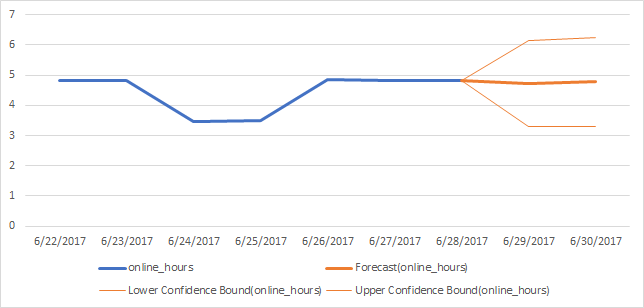

In [22]:
#convert to time series:
data = pd.read_csv('test.csv')
ts = data['date']
ts.head(10)

0    2017-6-28
1    2017-6-27
2    2017-6-26
3    2017-6-25
4    2017-6-24
5    2017-6-23
6    2017-6-22
7    2017-6-28
8    2017-6-27
9    2017-6-26
Name: date, dtype: object

In [23]:
from datetime import datetime
con=data['date']
data['date']=pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['2017-06-28', '2017-06-27', '2017-06-26', '2017-06-25',
               '2017-06-24', '2017-06-23', '2017-06-22', '2017-06-28',
               '2017-06-27', '2017-06-26',
               ...
               '2017-06-24', '2017-06-23', '2017-06-22', '2017-06-28',
               '2017-06-27', '2017-06-26', '2017-06-25', '2017-06-24',
               '2017-06-23', '2017-06-22'],
              dtype='datetime64[ns]', name='date', length=17500, freq=None)

In [24]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)